# Modelo dinámico de un circuito RLC

In [1]:
import sympy as sym
import numpy as np
sym.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline




| Elemento | Dominio del tiempo  (EDO)| 
|:---:|:---:|
| ![Resistancia](figuras/resistor.png) | $u(t) = R \cdot i(t)$ | $U(s) = R \cdot I(s)$ | $R$ |
| ![Inductor](figuras/inductor.png) | $\begin{matrix} u(t) = L \frac{d}{dt} i(t) \\ i(t) = \frac{1}{L} \int_{0}^{t} u(\tau) d\tau + i(0+) \epsilon(t) \end{matrix}$ | $\begin{matrix} U(s) = s L I(s) - L i(0+) \\ I(s) = \frac{1}{s L} U(s) + \frac{1}{s} i(0+) \end{matrix}$ | $s L$ |
| ![Capacitor](figuras/capacitor.png) | $\begin{matrix} u(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau + u(0+) \epsilon(t) \\ i(t) = C \frac{d}{dt} u(t) \end{matrix}$ | $\begin{matrix} U(s) = \frac{1}{s C} I(s) + \frac{1}{s} u(0+) \\ I(s) = s C U(s) - C u(0+) \end{matrix}$ | $\frac{1}{s C}$


Considere el circuito que se muestra en la figura. Suponga que la entrada es el voltaje $x(t)$ y la salida es el voltaje $y(t)$. Suponga además que no hay energía almacenada en los elementos que almacenan energía en $t<0$. Además, considere que $x(t)=0 \forall t<0$.

![bloque](figuras/bloque_tiempo.PNG)


![Circuito](figuras/lowpass.png)

El voltaje $x(t)$ es igual a los voltajes que caen en la red $RLC$.


\begin{align}
v_R(t) + v_L(t) + v_C(t) &= x(t) \\
R i(t) + L \frac{di}{dt} + \frac{1}{C} \int_{0}^{t} i(\tau) d\tau &= x(t) \\
\end{align}

La salida $y(t)$ es el voltaje del capacitor.

\begin{equation}
y(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau
\end{equation}

De donde se obtiene la corriente $i(t)$

\begin{equation}
C \frac{dy}{dt} = i(t)
\end{equation}

Incorporando las expresiones de la salida $y(t)$ y la variable interna $i(t)$ en la ecuación de la malla se obtiene

\begin{align}
R i(t) + L \frac{di}{dt} + \frac{1}{C} \int_{0}^{t} i(\tau) d\tau &= x(t) \\
C R \frac{d y(t)}{dt} + C L \frac{d^2 y(t)}{dt^2} + y(t)& = x(t) \\
\end{align}

-------------------


\begin{equation}
y(t) = \frac{1}{C} \int_{0}^{t} i(\tau) d\tau
\end{equation}


\begin{equation}
C \cdot y(t) = C \cdot \frac{1}{C} \int_{0}^{t} i(\tau) d\tau
\end{equation}

\begin{equation}
C \cdot y(t) =  \int_{0}^{t} i(\tau) d\tau
\end{equation}

\begin{equation}
\frac{d}{dt} (C \cdot y(t)) =  \frac{d}{dt}(\int_{0}^{t} i(\tau) d\tau)
\end{equation}

\begin{equation}
C \frac{dy}{dt} =  i(t)
\end{equation}

Aplicando la Transformada de Fourier al modelo se obtiene:

\begin{align}
R i(t) + L \frac{di}{dt} + \frac{1}{C} \int_{0}^{t} i(\tau) d\tau &= x(t) \\
C R \frac{d y(t)}{dt} + C L \frac{d^2 y(t)}{dt^2} + y(t)& = x(t) \\
C R j\omega Y(j\omega) + C L j^2 \omega^2 Y(j\omega) + Y(j\omega) &= X(j\omega)\\
-C L \omega^2 Y(j\omega) +C R j\omega Y(j\omega) +  Y(j\omega) &= X(j\omega)\\
\frac{Y(j\omega)}{X(j\omega)}=\frac{1}{-C L \omega^2 +C R j\omega  +  1}
\end{align}

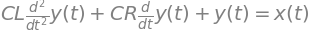

In [18]:
t, L, R, C, w = sym.symbols('t L R C \omega', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(C*R*y.diff(t) + C*L*y.diff(t, 2) +  y, x)
ode

Dada una entrada $x(t)$, se puede calcular la solución del sistema. Observe que al usar `dsolve` obtiene la solución general de la homogénea relacionada junto a la solución particular.

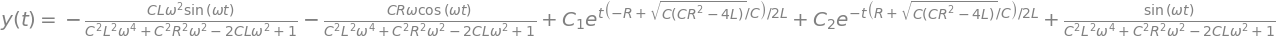

In [19]:
u = sym.sin(w*t)
# u = sym.Heaviside(t)*t
# sol = sym.dsolve( ode.subs(x,u))
sol = sym.dsolve( ode.subs(x,u))
sol

Las constantes $C_1$ y $C_2$ deben calcularse para satisfacer las condiciones iniciales  $y(t) = 0$ and $\frac{d y(t)}{dt} = 0$ para $t<0$. 

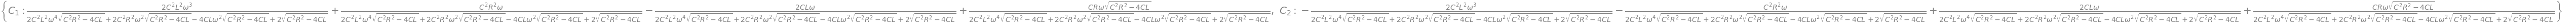

In [20]:
C_int = sym.solve((sol.rhs.limit(t, 0, '-'),
                   sol.rhs.diff(t).limit(t, 0, '-')),
                  ['C1', 'C2'])
C_int

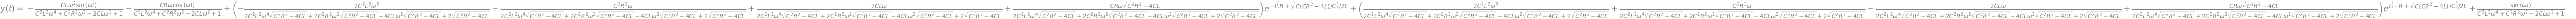

In [21]:
sol = sol.subs(C_int)
sol

In [22]:
RLC = {R: 20,     
       L: 0.05,
       C: .03}
RLC

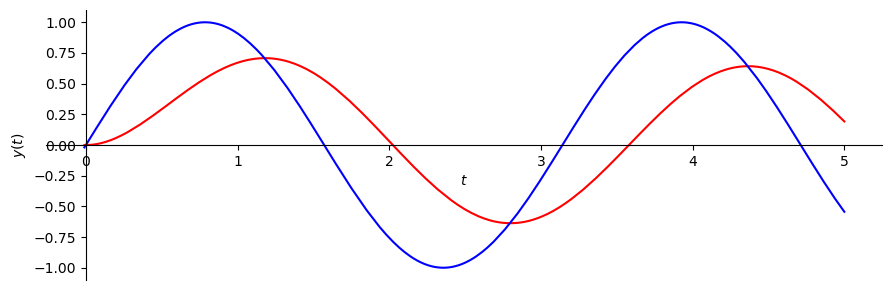

In [57]:
w0 =2
tlaps = (t,-10e-3,5)

plt.rcParams['figure.figsize'] = 9, 3

g1 = sym.plot(sol.rhs.subs(RLC).subs(w,w0), tlaps, line_color='red',
         ylabel = '$y(t)$',show = False);

g2 = sym.plot(u.subs(w,w0), tlaps, line_color='blue',
         ylabel = '$x(t)$',show = False);
g1.extend(g2)
g1.show()

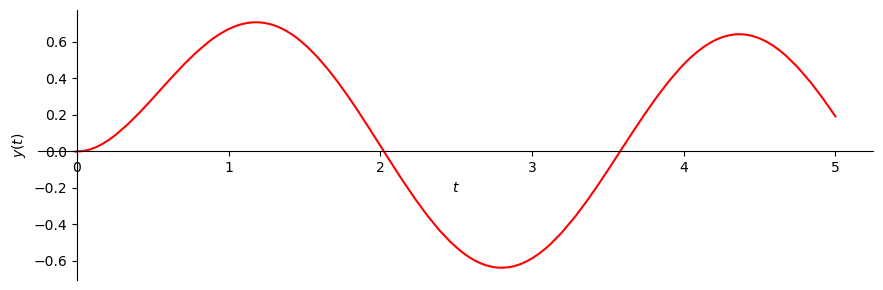

In [58]:
sym.plot(sol.rhs.subs(RLC).subs(w,w0), tlaps, line_color='red',
         ylabel = '$y(t)$',show = True);

Qué dice la transformada de Fourier?

In [59]:
# La función de transferencia
F = 1 / (-C*L*w**2 +1j*C*R*w + 1 )
F

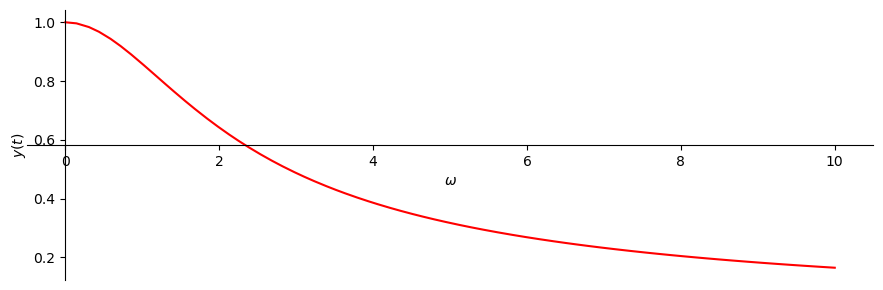

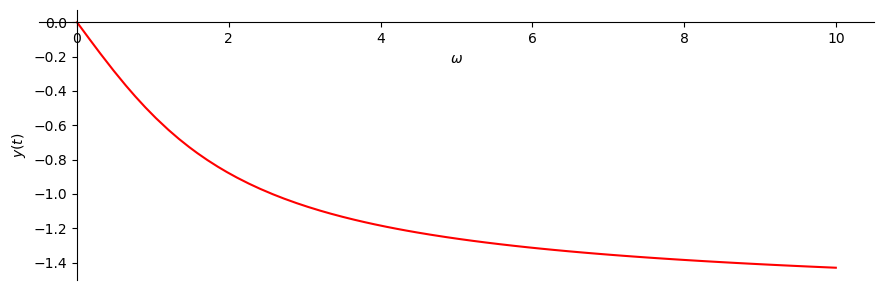

In [60]:
wlaps = (w,0,10)

plt.rcParams['figure.figsize'] = 9, 3

sym.plot(sym.Abs(F.subs(RLC)), wlaps, line_color='red',
         ylabel = '$y(t)$',show = True);
sym.plot(sym.arg(F.subs(RLC)), wlaps, line_color='red',
         ylabel = '$y(t)$',show = True);


En una frecuencia particular se obtiene:

In [61]:
w0

In [62]:
F.subs(RLC).subs(w,w0)

In [63]:
Fw0 = F.subs(RLC).subs(w,w0)
Fw0

Magnitud y fase

In [64]:
Mw0 = sym.Abs(Fw0)
Mw0

In [65]:
Pw0 =sym.arg(Fw0)
Pw0

Es decir que la salida del sistema ante una oscilación de esa frecuencia y amplitud 1 sería

In [66]:
y_fourier = Mw0*sym.sin(w0*t+Pw0)
y_fourier

Comparando con la calculada con la ecuación diferencial


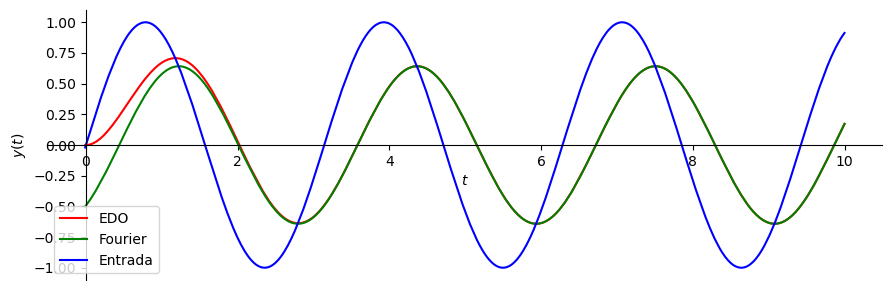

In [67]:
tlaps = (t,-10e-3,10)

plt.rcParams['figure.figsize'] = 9, 3

g1 = sym.plot(sol.rhs.subs(RLC).subs(w,w0), tlaps, line_color='red',
         ylabel = '$y(t)$',show = False,legend = True, label =  'EDO');
g2 = sym.plot(y_fourier, tlaps, line_color='green',
         ylabel = '$y(t)$',show = False,legend = True, label = 'Fourier');
g3 = sym.plot(u.subs(w,w0), tlaps, line_color='blue',legend = True,
              label = 'Entrada', show = False);
g1.extend(g2)
g1.extend(g3)
g1.show()